<a href="https://colab.research.google.com/github/hnlgangte/EDA/blob/master/LDA_HRattrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis

Linear Discriminant Analysis is a dimensionality reduction technique used as a preprocessing step in Machine Learning and pattern classification applications.

The main goal of dimensionality reduction techinques is to reduce the dimensions by removing the reduntant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.

Linear Discriminant Analysis is a supervised classification technique which takes labels into consideration.image.png

Unlike PCA, where our goal was to retain maximum variance, here we try to project a dataset onto a lower dimensional space with good class seperability in order to avoid overfitting.

### What is dimensionality reduction?

Most of the time, we deal with datasets having lots of __redundant parameters__ that don’t provide significant amount of new information to us. 

Using these parameters in __building our model won’t help in increasing our accuracy for prediction__ and may __decrease__ too!

One way to deal with it could be by __deleting__ these parameters but this would __lead to significant data loss__ if there are many such parameters.

Hence, dimensionality reduction comes into the picture.

Differenct techniques for Dimensionality Reduction:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

## IBM Attrition and Performance ( HR Analytics)

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

__Education__
1. Below College 
2. College 
3. Bachelor 
4. Master 
5. Doctor

__EnvironmentSatisfaction__
1. Low
2. Medium
3. High
4. Very High

__JobInvolvement__ 
1. Low
2. Medium
3. High
4. Very High

__JobSatisfaction__
1. Low
2. Medium
3. High
4. Very High

__PerformanceRating__
1. Low
2. Good
3. Excellent
4. Outstanding

__RelationshipSatisfaction__ 
1. Low
2. Medium
3. High
4. Very High

__WorkLifeBalance__
1. Bad
2. Good
3. Better
4. Best

### Data Loading and description

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/Attrition_LDA.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data Exploration

In [88]:
#checking the shape of the dataset
data.shape

(1470, 35)

#### Correlation heatmap

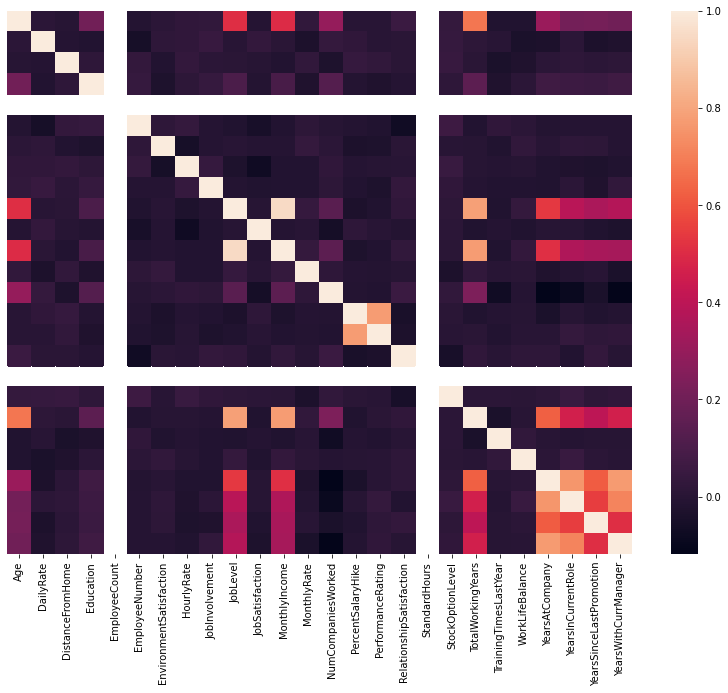

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),yticklabels=False,cbar=True,linewidths=0)
plt.show()

In [33]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [34]:
corr1 = data.corr().abs()
corr1[corr1 == 1] = 0
corr_cols = corr1.unstack().sort_values(ascending=False).drop_duplicates()

corr_df = pd.DataFrame(corr_cols[corr_cols > 0.75])
corr_df

,,0
MonthlyIncome,JobLevel,0.950300
TotalWorkingYears,JobLevel,0.782208
PercentSalaryHike,PerformanceRating,0.773550
TotalWorkingYears,MonthlyIncome,0.772893
YearsWithCurrManager,YearsAtCompany,0.769212
YearsInCurrentRole,YearsAtCompany,0.758754


The above data shows there is a severe correlation in the data. Dropping these features may cause to lose enough information. We will try using decomposition to solve this problem

####Kernel Density distribution of Daily Rate against EducationalField.

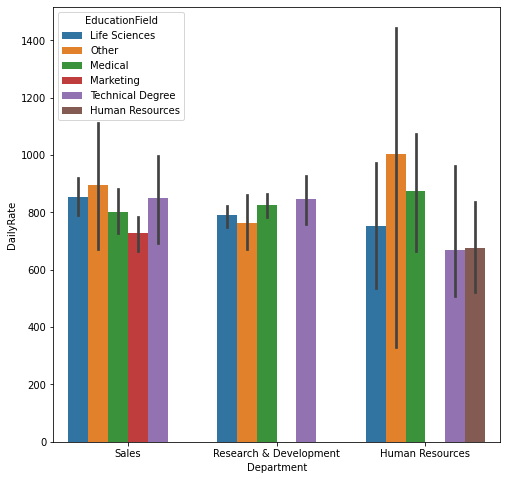

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Department'],y=data['DailyRate'],hue=data['EducationField'])
plt.show()

#### Visualize count of Yes and No in the Attrition variable.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


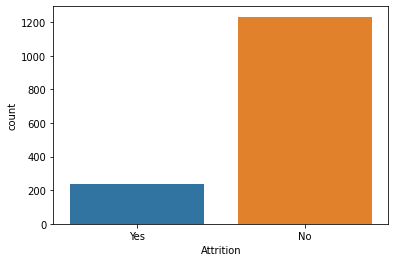

In [36]:
sns.countplot(data['Attrition'])
plt.show()

#### Check the columns present in the dataset.

In [37]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Feature Engineering

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From the above, we observe that there are 9 categorical variables. Let's create dummy variables of them.

In [90]:
BusinessTravel= pd.get_dummies(data['BusinessTravel'],drop_first=True)
Department= pd.get_dummies(data['Department'],drop_first=True)
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)
Gender= pd.get_dummies(data['Gender'],drop_first=True)
JobRole= pd.get_dummies(data['JobRole'],drop_first=True)
MaritalStatus=pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [91]:
Train=data

In [93]:
def StrToBin(a):
  if a=="Yes":
    return 1
  else:
    return 0

In [94]:
def StrToBinb(a):
  if a=="Y":
    return 1
  else:
    return 0

In [95]:
Train['Attrition']=Train['Attrition'].apply(StrToBin)
#one at a time

In [96]:
Train['OverTime']=Train['OverTime'].apply(StrToBin)

In [97]:
Train['Over18']= Train["Over18"].apply(StrToBinb)


In [98]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Dropping Redundant variables

In [99]:
Train.drop(['Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus','JobLevel'],axis=1,inplace=True)

#### Concat the splitted data into one

In [100]:
Train = pd.concat([Train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

In [101]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EmployeeCount             1470 non-null   int64
 6   EmployeeNumber            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  Over18                    1470 non-null 

As we can see, there are many features in this data. Removing the features might lose information. Instead of feature selection, We are going to extract features from this data using Linear Discriminant Analysis

In [102]:
m = list(Train.columns)
n = list(filter(lambda t: t not in ['Attrition'], m))

#### Preparing X and y

In [103]:
X = Train[n]
#y=X.pop('Attrition')

In [104]:
y = Train['Attrition']

### BASE MODEL : Logistic Regression Only

#### Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Standardizing the variables

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling and prediction

In [107]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc,y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.06151866912841797


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [109]:
y_pred = fit1.predict(X_test_sc)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



### MODEL 0: LDA only

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [113]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [115]:
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
cm_0 = confusion_matrix(y_test, y_test_pred_0)
cr_0 = classification_report(y_test, y_test_pred_0)
print(cm_0)
print(cr_0)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



### MODEL 1: LDA + Logistic Regression

#### Applying LDA

In [117]:
lda = LDA(n_components = 2)
X_train_1 = lda.fit_transform(X_train_sc, y_train)
X_test_1 = lda.transform(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1) #euc method
start_time = time.time()
fit1 = classifier.fit(X_train_1, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.009251117706298828


In [119]:
y_pred = fit1.predict(X_test_1)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report
cm_1 = confusion_matrix(y_test, y_pred)
cr_1 = classification_report(y_test, y_pred)
print(cm_1)
print(cr_1)

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



### Computing time difference between two different logistic regression models created

In [121]:
time_diff = time3/time2
print(time_diff)

0.1503790286325515


### Applying KNN, SVM and Decision Tree and comparing using accuracy score

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [123]:
lda = LDA(n_components = 2,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


#### Model 2: LDA + KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [125]:
pred = knn.predict(X_test)

#### Choosing the best K

In [126]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

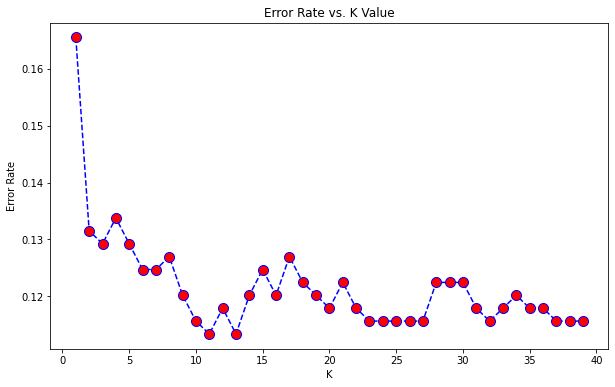

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Report

In [128]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[350  21]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       371
           1       0.60      0.44      0.51        70

    accuracy                           0.86       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.85      0.86      0.86       441



#### Model Evaluation using accuracy score.

In [129]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8639455782312925


### MODEL 3: LDA + SVM

In [134]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train_1,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [135]:
predictions = model.predict(X_test_1)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



In [137]:
print(accuracy_score(y_test, predictions))

0.8843537414965986


### MODEL 4: LDA + Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC(criterion='entropy',splitter='random')
tree = dt.fit(X_train_1,y_train)
pred_t = dt.predict(X_test_1)
cm = confusion_matrix(y_test,pred_t)
cr = classification_report(y_test,pred_t)
print(cm)
print(cr)

[[335  36]
 [ 35  35]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       371
           1       0.49      0.50      0.50        70

    accuracy                           0.84       441
   macro avg       0.70      0.70      0.70       441
weighted avg       0.84      0.84      0.84       441



In [139]:
print(accuracy_score(y_test, pred_t))

0.8390022675736961
